In [1]:
# ETHZ model: exploring the boosted model data
#
#
# Original: vikki.thompson 19/06/2023
# Last Editted 23/01/2024

In [1]:
### Load neccessary libraries
import subprocess
import numpy as np
import iris
import sys
import matplotlib.pyplot as plt
sys.path.append('/usr/people/thompson/WP1/boosting')
import functions_boosting as gboost
sys.path.append('/usr/people/thompson/WP1')
import functions_get_data as gdata
import functions_plot_data as pdata
import iris.coord_categorisation as icc
from iris.coord_categorisation import add_season_membership
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import cartopy as cart
import glob
import matplotlib.cm as mpl_cm
import sys
import scipy.stats as sps
from scipy.stats import genextreme as gev
import random
import scipy.io
import xarray as xr
import netCDF4 as nc
import iris.coords
import iris.util
from iris.util import equalise_attributes
from iris.util import unify_time_units
from scipy.stats.stats import pearsonr
import calendar
import cartopy.feature as cf
plt.ion(); plt.show()

/tmp/ipykernel_741293/427157596.py:31: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
## Variables
R1 = [70, 30, 30, -30] # analog region
date = [2021, 'Jul', 14] # event date

## Inputs
plotdate = '20070825' # '20090829' '20160801'
rain_region = [55, 45, 15, 0]

## larger area:
limit = 60 # how many gridpoints show rainfall above 60 mm/day (DWD 24hr alert level 1)

In [4]:
## Area for model events
all_area = []; all_rain = []
for startdate in ['20070818', '20070817', '20070816', '20070815', '20070814', '20070813']: 
    AREA = []; RAIN = []
    for i in range(50):
        print(i)
        TP_cube = gboost.get_TP_cube(startdate, plotdate, rain_region, i)
        a=len(TP_cube.data[TP_cube.data>limit])
        AREA.append(a)
        RAIN.append(np.max(TP_cube.data))
        if a>6:
            gboost.plot_prec_z500(startdate, plotdate, R1, i)
            print(startdate, plotdate, R1, i)
    all_area.append(AREA); all_rain.append(RAIN)
    #gboost.plot_prec_z500(startdate, plotdate, R1, 0)


0
1
2
3
4


KeyboardInterrupt: 

In [3]:
# Results from cell above
all_area60 = [[1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3], [0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 3, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 3, 0, 1, 3], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [3, 0, 2, 3, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 4, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 3, 0, 1, 0, 1, 3], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
all_rain60 = [[62.08114700712031, 64.97228478110628, 62.67711014515953, 66.99342520732898, 68.61958645458799, 68.66176445328165, 67.68786424800055, 65.04460816358915, 67.04287188767921, 64.4626912617241, 62.30988947208971, 70.44025369395968, 62.54906838876195, 70.86948899086565, 68.77256764710182, 66.39886178163579, 70.09240307525033, 69.47800302441465, 66.92458882753272, 67.5741781378747, 64.9540492304368, 73.68484093603911, 72.50097405631095, 64.93585788120981, 62.1479943220038, 57.17730637115892, 62.87132146098884, 63.83089548762655, 65.79238361155149, 65.18353820865741, 63.18962587101851, 66.19476898777066, 62.17146528797457, 59.64982210571179, 62.29110877029598, 62.46106331673218, 65.98872150789248, 71.75465725595132, 65.6007065117592, 67.46884118911112, 65.25171647808747, 63.37872946460266, 66.89933015877614, 68.57333210064098, 61.73180827317992, 63.37146078294609, 64.54133053921396, 67.32269648637157, 64.92096690635663, 68.97328639752232], [59.57551948085893, 46.957554695836734, 54.48122956295265, 66.58643305854639, 43.18632691138191, 52.707189934153575, 66.48995113209821, 62.20704744919203, 59.49511214566883, 66.65093278570566, 65.99966873181984, 60.45996087777894, 62.286398861033376, 64.34135830204468, 64.7521075734403, 64.5397098196554, 64.98865895991912, 48.11985618289327, 76.46457142982399, 68.32362341810949, 60.046323778806254, 45.65840063150972, 59.105751461174805, 66.59379996563075, 69.43036860320717, 49.16127654723823, 68.14685202698456, 68.0337847370538, 57.318893414048944, 54.25215804280015, 68.36013380961958, 67.20169258187525, 61.34452996775508, 67.83460812584963, 65.7079637676361, 60.0871904680389, 69.20601190358866, 60.13923521095421, 67.20257661072537, 51.36586278240429, 49.48120658809785, 63.32786833809223, 60.44748133717803, 54.20904690254247, 60.958651374676265, 57.912003103410825, 72.77946770045673, 55.82717330980813, 63.644272086094134, 59.177323419135064], [35.37727279763203, 28.736811509588733, 77.33229977020528, 43.377709334890824, 77.3338959334069, 68.7652302076458, 61.727167121716775, 41.989553210441954, 26.317985793866683, 68.8391399307875, 55.13981141120894, 57.5803940591868, 28.714506970572984, 69.38314181752503, 67.28976150043309, 69.20791256561643, 65.73087484866846, 48.008502926677465, 61.56807630759431, 36.155122415948426, 63.344768022943754, 66.81470895273378, 24.93995425538742, 24.98599988030037, 30.365939164767042, 65.28751473524608, 68.21413644502172, 64.0533957266598, 65.18616082757944, 31.20769424640457, 35.025475972361164, 62.08490412973333, 33.48942182128667, 75.25303444708697, 36.69701000035275, 74.5454086427344, 23.507746482209768, 44.73344124562573, 60.29219675838249, 43.15209043852519, 65.29312340717297, 48.44586637773318, 60.8289545198204, 20.177737496851478, 26.75815112525015, 42.47451670380542, 84.02983003179543, 28.336125433270354, 68.96196100569796, 71.23075720301131], [33.53421507199528, 26.39990825628047, 50.08402586099692, 62.260030244942755, 26.819758113560965, 32.32472608942771, 54.463303422380704, 25.88299939816352, 40.925386292656185, 37.1517372514063, 27.71119807221112, 20.42332807832281, 22.867753796163015, 27.711350321624195, 67.44395577698015, 37.67847847484518, 54.305420781020075, 47.82818068633787, 42.11761461192509, 30.127555874059908, 40.59540287926211, 59.922441869275644, 59.149898879695684, 37.39869071068824, 36.60535339804483, 26.692715800891165, 50.990612180612516, 54.79076735355193, 27.91284505292424, 67.73157947463915, 45.00631148403045, 63.726545704412274, 56.42120631819125, 37.20534868989489, 44.861610695079435, 56.693492115300614, 45.352398956310935, 70.62473578116624, 62.486818023899104, 43.37542068242328, 29.863066720281495, 45.73374444589717, 29.231135886220727, 15.531125927736866, 48.89390693278983, 41.32949798076879, 52.08724996919045, 44.25737697602017, 67.84562410757644, 66.1209820464137], [70.74326440488221, 52.29215803410625, 80.7868389529176, 79.28410777822137, 67.01960228383541, 48.2921534057823, 63.18636478681583, 53.39753788575763, 44.032023288309574, 75.13825312344125, 61.0064478678396, 45.75823204504559, 41.329242594656534, 64.40196830226341, 70.62530548864743, 60.2708523729234, 67.91397918277653, 71.3529496351839, 47.19867847597925, 80.23859863897087, 78.51294485590188, 74.30727582686814, 63.007560129335616, 46.71804672398139, 64.80588599515613, 74.54134211002383, 57.34609694627579, 71.7566414095927, 54.33223141153576, 48.203549158643, 59.40486262261402, 57.8672172196093, 32.35576532460982, 68.96751074236818, 39.759835999575444, 62.04054061527131, 54.041297516960185, 62.24657827260671, 63.21353885141434, 52.306042198324576, 61.9120912233484, 72.87857224582694, 53.6428264240385, 36.87931639433373, 78.66553314670455, 50.35793728893623, 67.64262652723119, 44.43802336027147, 60.16404695401434, 79.10839722171659], [69.46298926777672, 37.26560998984496, 29.879684007028118, 54.68573981488589, 51.76875893084798, 48.675487960281316, 42.41543410898885, 58.34804051119136, 45.81331686495105, 51.329529196664225, 56.73586656484986, 61.207780527183786, 14.496183530354756, 38.975233383098384, 38.303113615256734, 46.20636591425864, 66.31989344896283, 39.386810203723144, 48.868078556552064, 42.993269744329154, 46.86150987254223, 42.440943252586294, 35.247232153778896, 49.88138189219171, 15.980736861820333, 12.41074719473545, 13.390278172664694, 46.88878707383992, 64.94541521533392, 50.57307553215651, 18.036700657830806, 79.40921750559937, 32.6931426570809, 40.84788151885732, 21.340773218980758, 18.725659947449458, 46.17918202711735, 28.55390839613392, 14.102845943853026, 19.92655297726742, 48.24561910936609, 43.703812843887135, 48.06815522897523, 39.770235616742866, 56.347203280893154, 31.31798666800023, 54.13847193267429, 40.225390148407314, 44.70827097975416, 61.04827225499321]]

In [4]:
### Result from cell above 40 mm/day limit
all_area40 = [[4, 5, 5, 4, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 5, 5, 6, 5, 4, 5, 4, 4, 3, 3, 4, 4, 5, 4, 3, 4, 4, 4, 4, 3, 4, 5, 5, 4, 4, 5, 4, 4, 3, 4, 4, 4, 4, 5, 4], [1, 3, 4, 3, 2, 4, 4, 3, 4, 3, 4, 3, 3, 6, 3, 4, 1, 5, 5, 4, 3, 4, 3, 5, 2, 3, 3, 3, 2, 5, 4, 4, 4, 4, 4, 4, 4, 5, 2, 2, 3, 4, 3, 4, 4, 5, 3, 4, 3, 4], [0, 7, 1, 5, 5, 5, 1, 0, 4, 3, 2, 0, 6, 4, 4, 4, 2, 3, 0, 4, 4, 0, 0, 0, 4, 4, 4, 3, 0, 0, 3, 0, 5, 0, 5, 0, 1, 2, 2, 3, 2, 3, 0, 0, 2, 5, 0, 5, 5, 0], [0, 3, 4, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 4, 0, 3, 3, 1, 0, 1, 3, 3, 0, 0, 0, 3, 2, 0, 3, 3, 4, 4, 0, 3, 3, 1, 5, 4, 1, 0, 2, 0, 0, 3, 1, 2, 1, 4, 5, 0], [3, 8, 5, 8, 3, 4, 4, 2, 6, 3, 2, 1, 5, 5, 6, 4, 5, 4, 7, 7, 5, 7, 1, 5, 6, 4, 7, 2, 3, 4, 4, 0, 6, 0, 6, 3, 4, 4, 3, 6, 6, 1, 0, 7, 2, 5, 1, 5, 7, 6], [0, 0, 1, 3, 3, 1, 4, 1, 3, 4, 4, 0, 0, 0, 2, 3, 0, 3, 1, 1, 3, 0, 3, 0, 0, 0, 1, 3, 2, 0, 8, 0, 1, 0, 0, 3, 0, 0, 0, 3, 2, 4, 0, 4, 0, 3, 1, 3, 3, 4]]
all_rain40 = [[64.97228478110628, 62.67711014515953, 66.99342520732898, 68.61958645458799, 68.66176445328165, 67.68786424800055, 65.04460816358915, 67.04287188767921, 64.4626912617241, 62.30988947208971, 70.44025369395968, 62.54906838876195, 70.86948899086565, 68.77256764710182, 66.39886178163579, 70.09240307525033, 69.47800302441465, 66.92458882753272, 67.5741781378747, 64.9540492304368, 73.68484093603911, 72.50097405631095, 64.93585788120981, 62.1479943220038, 57.17730637115892, 62.87132146098884, 63.83089548762655, 65.79238361155149, 65.18353820865741, 63.18962587101851, 66.19476898777066, 62.17146528797457, 59.64982210571179, 62.29110877029598, 62.46106331673218, 65.98872150789248, 71.75465725595132, 65.6007065117592, 67.46884118911112, 65.25171647808747, 63.37872946460266, 66.89933015877614, 68.57333210064098, 61.73180827317992, 63.37146078294609, 64.54133053921396, 67.32269648637157, 64.92096690635663, 68.97328639752232, 62.08114700712031], [46.957554695836734, 54.48122956295265, 66.58643305854639, 43.18632691138191, 52.707189934153575, 66.48995113209821, 62.20704744919203, 59.49511214566883, 66.65093278570566, 65.99966873181984, 60.45996087777894, 62.286398861033376, 64.34135830204468, 64.7521075734403, 64.5397098196554, 64.98865895991912, 48.11985618289327, 76.46457142982399, 68.32362341810949, 60.046323778806254, 45.65840063150972, 59.105751461174805, 66.59379996563075, 69.43036860320717, 49.16127654723823, 68.14685202698456, 68.0337847370538, 57.318893414048944, 54.25215804280015, 68.36013380961958, 67.20169258187525, 61.34452996775508, 67.83460812584963, 65.7079637676361, 60.0871904680389, 69.20601190358866, 60.13923521095421, 67.20257661072537, 51.36586278240429, 49.48120658809785, 63.32786833809223, 60.44748133717803, 54.20904690254247, 60.958651374676265, 57.912003103410825, 72.77946770045673, 55.82717330980813, 63.644272086094134, 59.177323419135064, 59.57551948085893], [28.736811509588733, 77.33229977020528, 43.377709334890824, 77.3338959334069, 68.7652302076458, 61.727167121716775, 41.989553210441954, 26.317985793866683, 68.8391399307875, 55.13981141120894, 57.5803940591868, 28.714506970572984, 69.38314181752503, 67.28976150043309, 69.20791256561643, 65.73087484866846, 48.008502926677465, 61.56807630759431, 36.155122415948426, 63.344768022943754, 66.81470895273378, 24.93995425538742, 24.98599988030037, 30.365939164767042, 65.28751473524608, 68.21413644502172, 64.0533957266598, 65.18616082757944, 31.20769424640457, 35.025475972361164, 62.08490412973333, 33.48942182128667, 75.25303444708697, 36.69701000035275, 74.5454086427344, 23.507746482209768, 44.73344124562573, 60.29219675838249, 43.15209043852519, 65.29312340717297, 48.44586637773318, 60.8289545198204, 20.177737496851478, 26.75815112525015, 42.47451670380542, 84.02983003179543, 28.336125433270354, 68.96196100569796, 71.23075720301131, 35.37727279763203], [26.39990825628047, 50.08402586099692, 62.260030244942755, 26.819758113560965, 32.32472608942771, 54.463303422380704, 25.88299939816352, 40.925386292656185, 37.1517372514063, 27.71119807221112, 20.42332807832281, 22.867753796163015, 27.711350321624195, 67.44395577698015, 37.67847847484518, 54.305420781020075, 47.82818068633787, 42.11761461192509, 30.127555874059908, 40.59540287926211, 59.922441869275644, 59.149898879695684, 37.39869071068824, 36.60535339804483, 26.692715800891165, 50.990612180612516, 54.79076735355193, 27.91284505292424, 67.73157947463915, 45.00631148403045, 63.726545704412274, 56.42120631819125, 37.20534868989489, 44.861610695079435, 56.693492115300614, 45.352398956310935, 70.62473578116624, 62.486818023899104, 43.37542068242328, 29.863066720281495, 45.73374444589717, 29.231135886220727, 15.531125927736866, 48.89390693278983, 41.32949798076879, 52.08724996919045, 44.25737697602017, 67.84562410757644, 66.1209820464137, 33.53421507199528], [52.29215803410625, 80.7868389529176, 79.28410777822137, 67.01960228383541, 48.2921534057823, 63.18636478681583, 53.39753788575763, 44.032023288309574, 75.13825312344125, 61.0064478678396, 45.75823204504559, 41.329242594656534, 64.40196830226341, 70.62530548864743, 60.2708523729234, 67.91397918277653, 71.3529496351839, 47.19867847597925, 80.23859863897087, 78.51294485590188, 74.30727582686814, 63.007560129335616, 46.71804672398139, 64.80588599515613, 74.54134211002383, 57.34609694627579, 71.7566414095927, 54.33223141153576, 48.203549158643, 59.40486262261402, 57.8672172196093, 32.35576532460982, 68.96751074236818, 39.759835999575444, 62.04054061527131, 54.041297516960185, 62.24657827260671, 63.21353885141434, 52.306042198324576, 61.9120912233484, 72.87857224582694, 53.6428264240385, 36.87931639433373, 78.66553314670455, 50.35793728893623, 67.64262652723119, 44.43802336027147, 60.16404695401434, 79.10839722171659, 70.74326440488221], [37.26560998984496, 29.879684007028118, 54.68573981488589, 51.76875893084798, 48.675487960281316, 42.41543410898885, 58.34804051119136, 45.81331686495105, 51.329529196664225, 56.73586656484986, 61.207780527183786, 14.496183530354756, 38.975233383098384, 38.303113615256734, 46.20636591425864, 66.31989344896283, 39.386810203723144, 48.868078556552064, 42.993269744329154, 46.86150987254223, 42.440943252586294, 35.247232153778896, 49.88138189219171, 15.980736861820333, 12.41074719473545, 13.390278172664694, 46.88878707383992, 64.94541521533392, 50.57307553215651, 18.036700657830806, 79.40921750559937, 32.6931426570809, 40.84788151885732, 21.340773218980758, 18.725659947449458, 46.17918202711735, 28.55390839613392, 14.102845943853026, 19.92655297726742, 48.24561910936609, 43.703812843887135, 48.06815522897523, 39.770235616742866, 56.347203280893154, 31.31798666800023, 54.13847193267429, 40.225390148407314, 44.70827097975416, 61.04827225499321, 69.46298926777672]]

In [12]:
# EOBS
mod = iris.load('/net/pc200023/nobackup/users/thompson/ETHZ/boosted_cubes/tp_'+plotdate+'.nc')[0]

file = '/net/pc230042/nobackup_1/users/sager/ClimateExplorer/sandbox/ENSEMBLES/rr_0.25deg_reg_v30.0eu.nc'
eobs_cube = iris.load(file)[0]
iris.coord_categorisation.add_year(eobs_cube, 'time')
iris.coord_categorisation.add_season(eobs_cube, 'time')
iris.coord_categorisation.add_day_of_year(eobs_cube, 'time')
eobs_cube = eobs_cube.extract(iris.Constraint(season='jja'))
eobs_cube = eobs_cube.extract(iris.Constraint(year=2021))
eobs_cube = eobs_cube.extract(iris.Constraint(day_of_year=195))
lat_con = iris.Constraint(latitude=lambda cell: 48 < cell < 52)
lon_con = iris.Constraint(longitude=lambda cell: 4 < cell < 9)
event = gdata.regrid(eobs_cube, mod) # regrid era-5 to model grid
event_prec = event.extract(lat_con&lon_con)

event_area40 = len(event.data[event.data>40])
event_area60 = len(event.data[event.data>60])

In [15]:
event_area60

4

In [ ]:
### Area for observed event
#event_prec = gdata.var_event_data('tp', R1, (2021, 'Jul', 14))
#TP_cube = gboost.get_TP_cube('20070818', plotdate, R1, 0)
#event = gdata.regrid(event_prec, TP_cube) # ERA-5 at model resolution
#event_area = len(event.data[event.data>40])

2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

0
2021


/tmp/ipykernel_741293/2250684909.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(['','0','1','2','3','4'])
/tmp/ipykernel_741293/2250684909.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(['','1','3','5','7','4'])


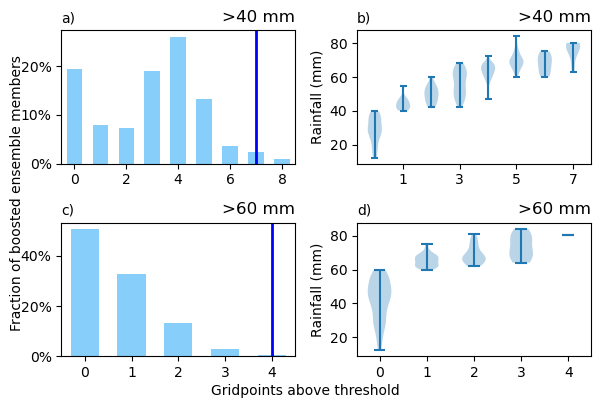

In [18]:

from matplotlib.ticker import PercentFormatter

all_area = all_area40
all_rain = all_rain40

colors=['lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue'] 
fig1, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,4))
data = [all_area[0], all_area[1], all_area[2], all_area[3], all_area[4], all_area[5]]
axs[0,0].hist(data,
         color=colors, histtype='bar', bins=np.arange(-.5,9.5,1), rwidth=.6, stacked=True, density=True)
axs[0,0].axvline(7, color='b', linewidth=2)
axs[0,0].set_title('a)', loc='left', fontsize='medium')
axs[0,0].set_xlim([-.5, 8.5])
#axs[0,0].set_yticks([])
axs[0,0].yaxis.set_major_formatter(PercentFormatter(1, decimals=0))

axs[0,0].set_title('>40 mm', loc='right')

grid0 = []; grid1 = []; grid2 = []; grid3 =[]; grid4=[];grid5=[];grid6=[];grid7=[]
for i in range(6):
    for j in range(50):
        if all_area[i][j] == 0:
            grid0.append(all_rain[i][j])
        elif all_area[i][j] == 1:
            grid1.append(all_rain[i][j])
        elif all_area[i][j] == 2:
            grid2.append(all_rain[i][j])
        elif all_area[i][j] == 3:
            grid3.append(all_rain[i][j])
        elif all_area[i][j] == 4:
            grid4.append(all_rain[i][j])
        elif all_area[i][j] == 5:
            grid5.append(all_rain[i][j])
        elif all_area[i][j] == 6:
            grid6.append(all_rain[i][j])
        elif all_area[i][j] == 7:
            grid7.append(all_rain[i][j])
                         


axs[0,1].violinplot([grid0, grid1, grid2, grid3, grid4, grid5, grid6, grid7], showmeans=False, showmedians=False)
axs[0,1].set_ylabel('Rainfall (mm)')
axs[0,1].set_title('b)', loc='left', fontsize='medium')
axs[0,1].set_title('>40 mm', loc='right')

all_area = all_area60
all_rain = all_rain60

colors=['lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue'] 
axs[1,0].hist([all_area[0], all_area[1], all_area[2], all_area[3], all_area[4], all_area[5]],
         color=colors, histtype='bar', bins=np.arange(-.5,9.5,1), rwidth=.6, stacked=True, density=True)
axs[1,0].axvline(event_area60, color='b', linewidth=2)
axs[1,0].set_title('>60 mm', loc='right')
axs[1,0].set_title('c)', loc='left', fontsize='medium')
axs[1,0].set_xlim([-.5, 4.5])
#axs[1,0].set_yticks([])
axs[1,0].yaxis.set_major_formatter(PercentFormatter(1,decimals=0))


grid0 = []; grid1 = []; grid2 = []; grid3 =[]; grid4=[]
for i in range(6):
    for j in range(50):
        if all_area[i][j] == 0:
            grid0.append(all_rain[i][j])
        elif all_area[i][j] == 1:
            grid1.append(all_rain[i][j])
        elif all_area[i][j] == 2:
            grid2.append(all_rain[i][j])
        elif all_area[i][j] == 3:
            grid3.append(all_rain[i][j])
        elif all_area[i][j] == 4:
            grid4.append(all_rain[i][j])

            
axs[1,1].violinplot([grid0, grid1, grid2, grid3, grid4], showmeans=False, showmedians=False)
axs[1,1].set_xticklabels(['','0','1','2','3','4'])
axs[1,1].set_ylabel('Rainfall (mm)')
axs[1,1].set_title('d)', loc='left', fontsize='medium')
axs[1,1].set_title('>60 mm', loc='right')


axs[0,1].set_xticklabels(['','1','3','5','7','4'])

fig1.text(0.5, 0, 'Gridpoints above threshold', ha='center')
plt.tight_layout()

fig1.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Fraction of boosted ensemble members")

plt.savefig('ThompsonBoosting_Fig4.png', dpi=80)

Text(0.5, 0, 'Number of gridpoints with rainfall >40 mm/day')

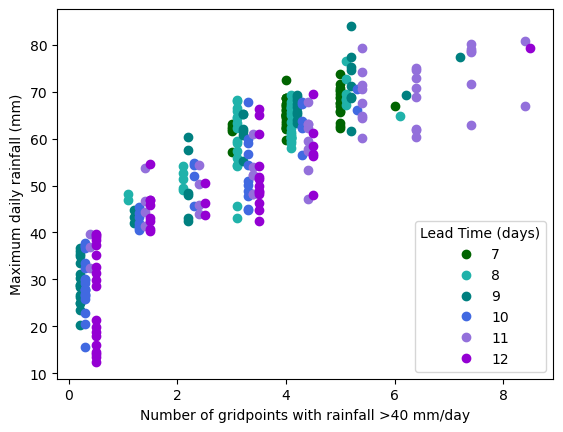

In [33]:
for i in np.arange(6):
    plt.plot(all_area[i]+i*.1, all_rain[i], 'o', color=colors[i], label=i+7)


plt.legend(title='Lead Time (days)')
plt.ylabel('Maximum daily rainfall (mm)')
plt.xlabel('Number of gridpoints with rainfall >40 mm/day')